In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay, SphericalVoronoi

In [2]:
def fibonacci_hemisphere(num_points: int):
    ga = (3 - np.sqrt(5)) * np.pi # golden angle                                                                             

    # Create a list of golden angle increments along tha range of number of points                                           
    theta = ga * np.arange(num_points)

    # Z is a split into a range of -1 to 1 in order to create a unit circle                                                  
    z = np.linspace(0, 1-1/num_points, num_points)

    # a list of the radii at each height step of the unit circle                                                             
    radius = np.sqrt(1 - z * z)

    # Determine where xy fall on the sphere, given the azimuthal and polar angles                                            
    y = radius * np.sin(theta)
    x = radius * np.cos(theta)
    
    return x, y, z, theta 

def plot(x, y, z): 
    # Display points in a scatter plot                                                                                       
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    plt.show()

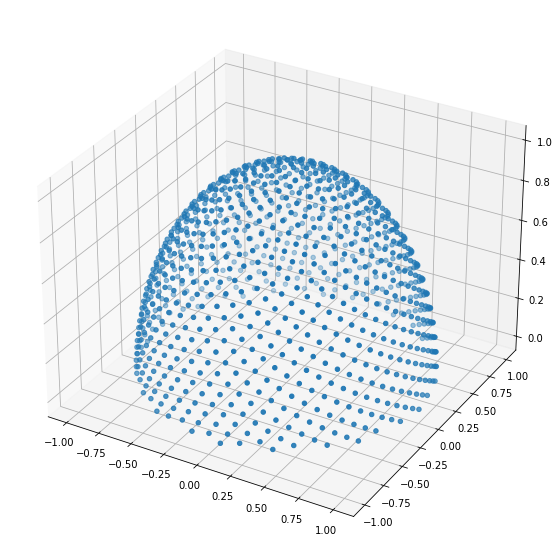

In [19]:
x, y, z, theta = fibonacci_hemisphere(1000)
plot(x, y, z)

In [12]:
tri = Delaunay(np.stack([x, y]).T)

# find all nearest neighbours of point 717 
points, indices = tri.vertex_neighbor_vertices
print(indices[points[717]:points[718]])

[628 683 738 772 751 662]


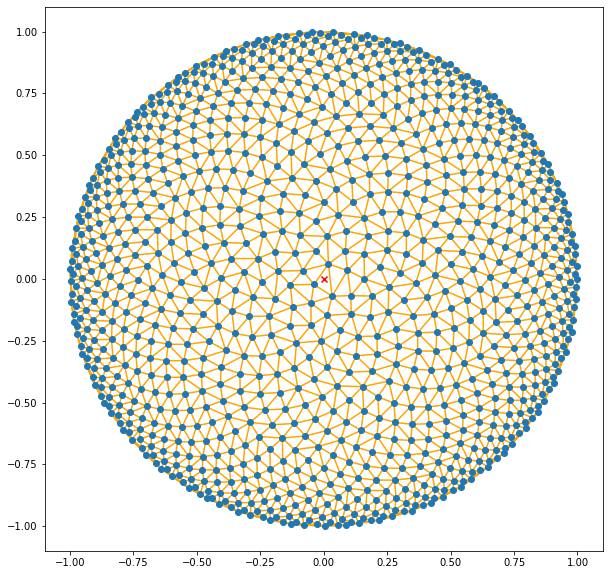

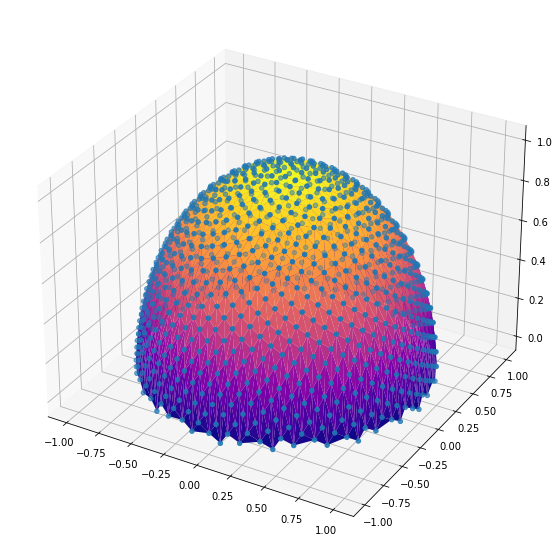

In [10]:
plt.figure(figsize=(10, 10))
plt.triplot(x, y, tri.simplices, c='orange')
plt.scatter(x, y)
plt.scatter([0], [0], marker='x', c='red')
plt.show() 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap='plasma')
ax.scatter(x, y, z)
plt.show()

In [22]:
x, y, z, theta = fibonacci_hemisphere(1000)

In [23]:
print(np.stack([x, y, z]).T.shape)

(1000, 3)


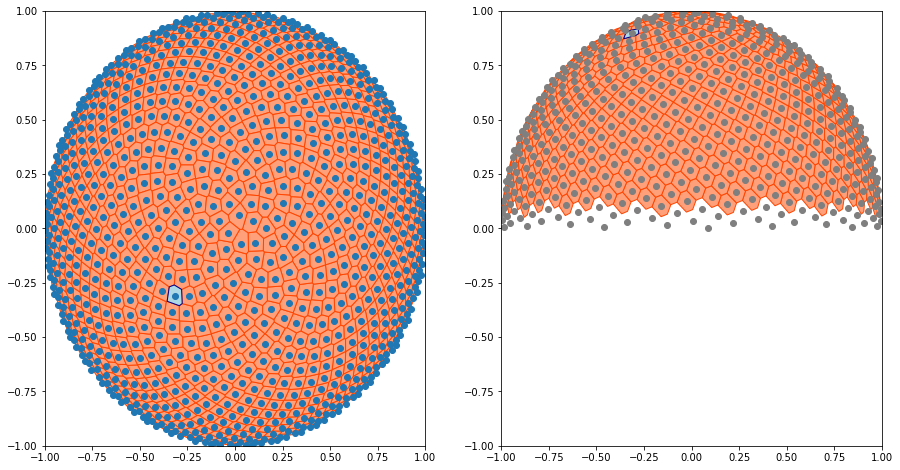

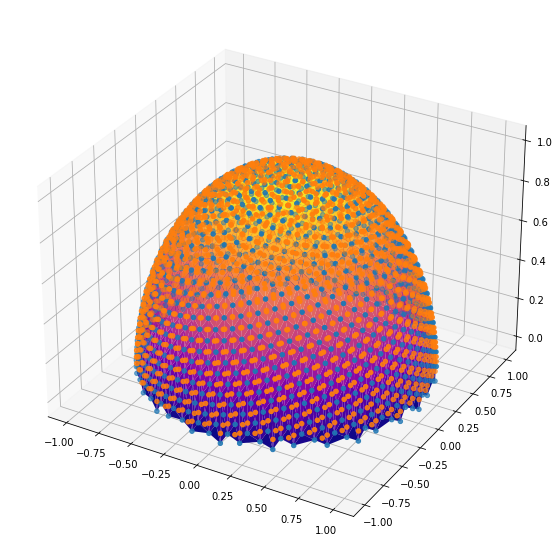

In [24]:
z_threshold = 0.05

vor = SphericalVoronoi(np.stack([x, y, z]).T)
vor.sort_vertices_of_regions()
m = (vor.vertices[:, -1] > z_threshold)
my = (vor.vertices[:, 1] < 0)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
m_region = np.ones(len(vor.regions))
for (i, region) in enumerate(vor.regions):
    poly = vor.vertices[region]
    if np.all(poly[:, -1] > z_threshold):
        axes[0].fill(poly[:, 0], poly[:, 1], facecolor='lightsalmon', edgecolor='orangered', linewidth=1)
        if np.all(poly[:, 1] < 0):
            axes[1].fill(poly[:, 0], poly[:, 2], facecolor='lightsalmon', edgecolor='orangered', linewidth=1)
    else:
        m_region[i] = 0 
m_region = m_region.astype('bool')


areas = vor.calculate_areas()
max_index = np.argmax(areas[m_region])
poly = vor.vertices[vor.regions[max_index]]
axes[0].fill(poly[:, 0], poly[:, 1], facecolor='lightblue', edgecolor='darkblue', linewidth=1)
axes[1].fill(poly[:, 0], poly[:, 2], facecolor='lightblue', edgecolor='darkblue', linewidth=1)
    
axes[0].scatter(x, y)
axes[0].set_xlim([-1, 1])
axes[0].set_ylim([-1, 1])

axes[1].scatter(x[y<0], z[y<0])
axes[1].set_xlim([-1, 1])
axes[1].set_ylim([-1, 1])
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap='plasma')
ax.scatter(x, y, z)
ax.scatter(*vor.vertices[m].T)
plt.show()

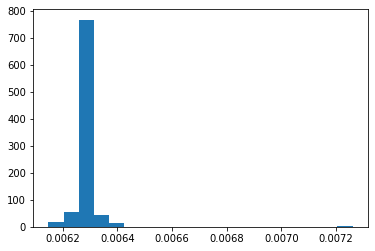

In [14]:
areas = vor.calculate_areas()
plt.hist(areas[m_region], bins=20)
plt.show()